# Tools for Data Science – Module 3 – Activity



For this activity first import a small data set containing 10 measurements of CO_2 levels and global temperatures. You can do this with the read_csv command from the pandas library as follows: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
my_data = pd.read_csv("global_warming.csv")

# Item 1

Print the first few rows of the my_data data frame. Then create lists storing the CO_2 and temperature values. Compute the mean and median of the temperature measurements.

In [4]:
print(my_data[0:3]) # Print the first 3 rows of the data
CO2_col = np.array(my_data["CO_2"]) # Extract the CO2 column
temp_col = np.array(my_data["Temp"]) # Extract the Temp column
C02_mean = np.mean(CO2_col) # Calculate the means of each column
temp_mean = np.mean(temp_col)

print("C02 mean: ", C02_mean, "Temp mean: ", temp_mean) # Prints out the means of each column



   CO_2  Temp
0   314  13.9
1   317  14.0
2   320  13.9
C02 mean:  337.7 Temp mean:  14.170000000000002


# Item 2

Make a scatterplot of CO_2 versus temperature. Is there a strong relationship between these two variables? What is the correlation cofficient? Can we infer that increasing carbon dioxide levels will increase global temperature?

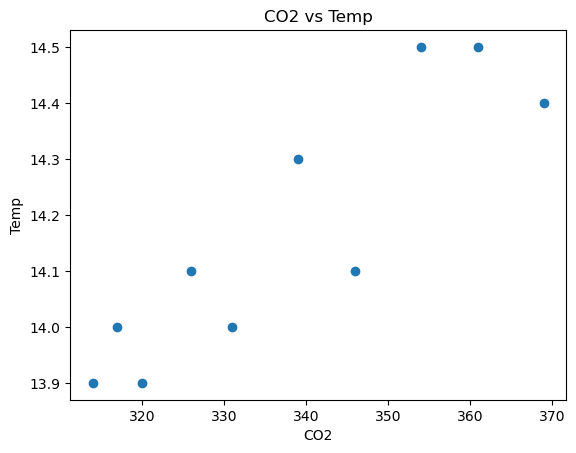

The correlation is strong.
Correlation:  0.8919763551653175


In [6]:
plt.scatter(CO2_col, temp_col) # Creates a scatter plot between C02 and Temp
plt.xlabel("CO2") 
plt.ylabel("Temp")
plt.title("CO2 vs Temp")
plt.show() 

correlation = np.corrcoef(CO2_col, temp_col)[0, 1] # Correlation coefficient calculation
if correlation > 0.5: # Determines if the correlation is strong or weak
    print("The correlation is strong.")
else:
    print("The correlation is weak.")

print("Correlation: ", correlation) # Prints out the correlation coefficient
    


Based on the data above, the correlation coefficient between temperature and C02 is 0.89, which is strong and nearly linear. This data suggests that as CO2 levels increase, temperature levels also increase. 

# Item 3

Change the last temperature measurement from 14.4 degrees to 144 degrees which could have happened if there was a small error in manual data entry. 

How are the mean and median affected?

How are the scatterplot and the correlation coefficient affected?

Are the mean, median, and correlation coefficient robust to outliers and data entry errors?

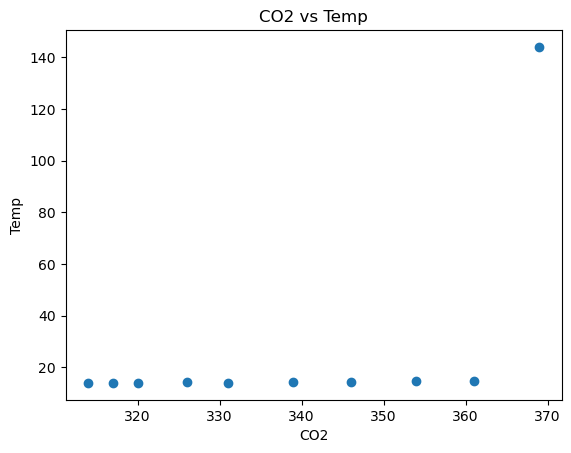

C02 new mean:  337.7 Temp new mean:  27.130000000000003
The correlation is strong.
New Correlation:  0.5745303015462886


In [9]:
temp_col[-1] = 144 # Changes the last value of the Temp column to 144 degrees
plt.scatter(CO2_col, temp_col) # Creates a scatter plot between C02 and Temp
plt.xlabel("CO2")
plt.ylabel("Temp")
plt.title("CO2 vs Temp")
plt.show()


C02_new_mean = np.mean(CO2_col) # Calculate the means of each column
temp_new_mean = np.mean(temp_col) 
print("C02 new mean: ", C02_new_mean, "Temp new mean: ", temp_new_mean) # Prints out the means of each column
new_correlation = np.corrcoef(CO2_col, temp_col)[0, 1] # Correlation coefficient calculation
if new_correlation > 0.5: # Determines if the correlation is strong or weak
    print("The correlation is strong.")
else:
    print("The correlation is weak.")

print("New Correlation: ", new_correlation) # Prints out the correlation coefficient



With the addition of this outlier in our dataset, I notice that the mean temperature greatly increased. It is also worth noting that the correlation coefficient is not as strong with a value of 0.57. Mean values and the correlation coefficient are the least robust to outliers. Median values aren't neccessarily affected by outliers. 

## Item 4: Poisson distribution 

In class, we looked at [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) and [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) discrete random variables. Another example of a discrete random variable is a *Poisson random variable*. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

### 4.1. Descriptive statistics

Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

A Poisson random variable is a form of a discrete random variable. The poisson probability distribution models the probability of events that occur over a certain interval of time. The parameter, $\lambda$, represents the number of times an event occurs in an interval of time. The mean and variance of a Poisson random variable is also simply $\lambda$. The min of a Poisson random variable is 0, and the max is $\infty$.

### 4.2. Example
Give an example of an application that is described by a Poisson random variable.

An example could be the number of customers that visit a particular store per hour. Another could be the ammount of tornados per year in Ohio. 

### 4.3. Probability mass function
For the parameter 
, plot the probability mass function (you may use scipy).

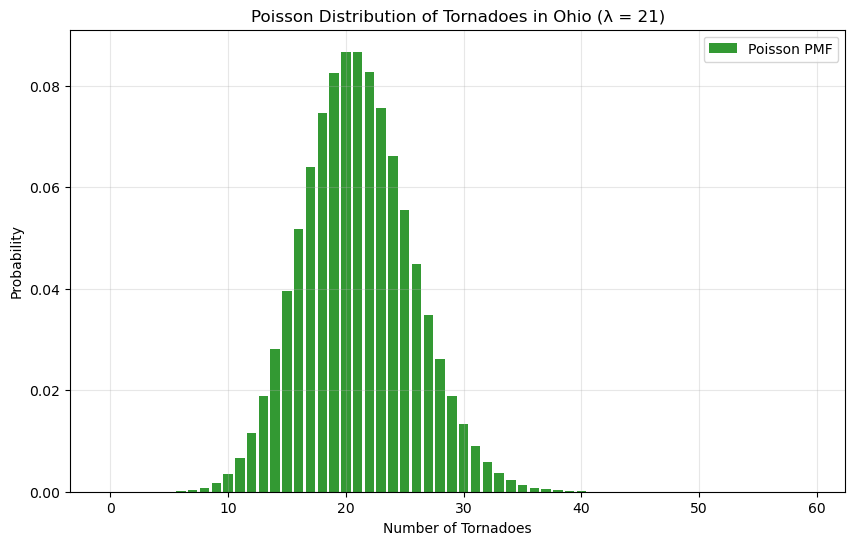

In [16]:
import scipy.stats as stats

lambda_param = 21 # Suppose we are modeling the number of tornados per year in Ohio. Google's AI from a quick google search said that Ohio gets about 21 per year. 
x = np.arange(60) # The x-axis range is from 0 to 60 (We can't have negative tornadoes lol)
pmf = stats.poisson.pmf(x, lambda_param) # Probability mass function using x and lambda

plt.figure(figsize=(10, 6)) # Creates figure
plt.bar(x, pmf, alpha=0.8, color='green', label='Poisson PMF') # Creates bar graph using our data. I chose green for the color. 
plt.title(f'Poisson Distribution of Tornadoes in Ohio (λ = {lambda_param})') # The following are various labels
plt.xlabel('Number of Tornadoes') 
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)
plt.legend() # Creates a legend to show what the bar graph represents
plt.show() # Shows graph

### 4.4. Poission sampling

Write python code that takes 1500 samples from the Poisson distribution with parameter $\lambda = 4$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

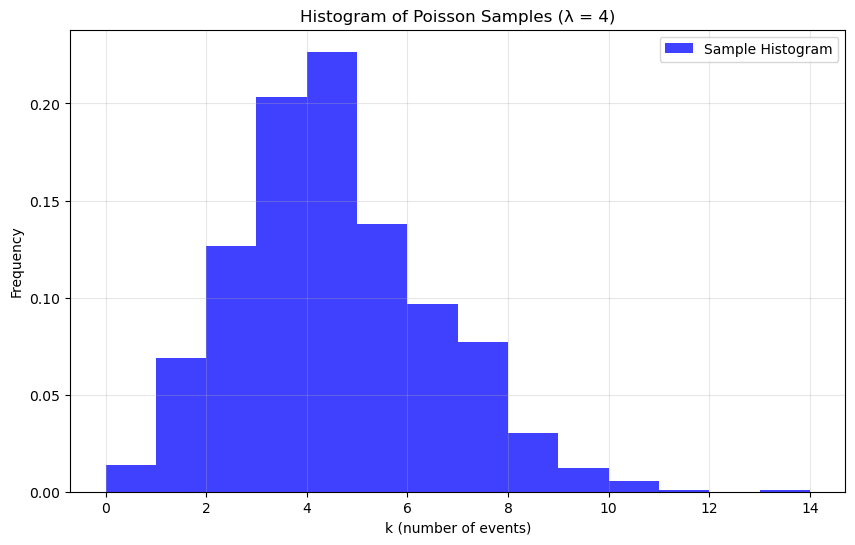

Sample Mean:  4.068
Sample Variance:  3.839376


In [18]:
# Take 1500 samples from the Poisson distribution with parameter λ = 4
samples = np.random.poisson(4, 1500)

# Make a histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=range(0, max(samples)+1), density=True, alpha=0.75, color='blue', label='Sample Histogram')
plt.title('Histogram of Poisson Samples (λ = 4)')
plt.xlabel('k (number of events)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Compute the sample mean and variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

print("Sample Mean: ", sample_mean)
print("Sample Variance: ", sample_variance)

Notice that the sample mean and the sample variance are both very close to 4? This illustrates how $\lambda$ = Var(X) = E(X) for this distribution specifically. 

## Submit your work!